## Домашнее задание 2

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 - 50 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 2 - 30 баллов


-----

### Задача 1

В этой задаче нужно визуализировать *центральную предельную теорему*.



Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

In [92]:
size = 300
samples_count = 500
par_lambda = 1

sample = sps.expon.rvs(scale = 1/par_lambda, size=(samples_count, size))
print(sample)

[[0.99353637 1.81564853 2.08460424 ... 0.58863829 3.42516753 0.33334731]
 [0.66120195 0.18884392 2.9715897  ... 0.07506256 1.27761251 0.36863674]
 [0.85908075 0.52464315 0.84234532 ... 0.67138498 0.67320284 0.52042778]
 ...
 [0.33378989 1.0428961  0.22567608 ... 0.60302386 3.75945267 0.06083   ]
 [0.37167213 1.34148959 1.53177563 ... 1.4041906  2.49159409 1.70703399]
 [1.94415212 0.7116934  1.00235991 ... 0.10214335 0.28525056 1.23060525]]


По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора.

In [93]:
sums = np.cumsum(sample, axis=1)
print(sums)

[[  0.99353637   2.8091849    4.89378914 ... 319.6752554  323.10042294
  323.43377024]
 [  0.66120195   0.85004587   3.82163557 ... 321.52302195 322.80063446
  323.1692712 ]
 [  0.85908075   1.3837239    2.22606922 ... 294.88833074 295.56153357
  296.08196136]
 ...
 [  0.33378989   1.37668598   1.60236206 ... 297.22768722 300.98713989
  301.04796988]
 [  0.37167213   1.71316173   3.24493735 ... 310.23565386 312.72724795
  314.43428194]
 [  1.94415212   2.65584552   3.65820543 ... 288.647868   288.93311856
  290.16372382]]


Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [94]:
Z = np.zeros_like(sums)

for n in range(1, size + 1):
    EX_jn = n / par_lambda
    DX_jn = n / (par_lambda ** 2)
    
    Z[:, n-1] = (sums[:, n-1] - EX_jn) / np.sqrt(DX_jn)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

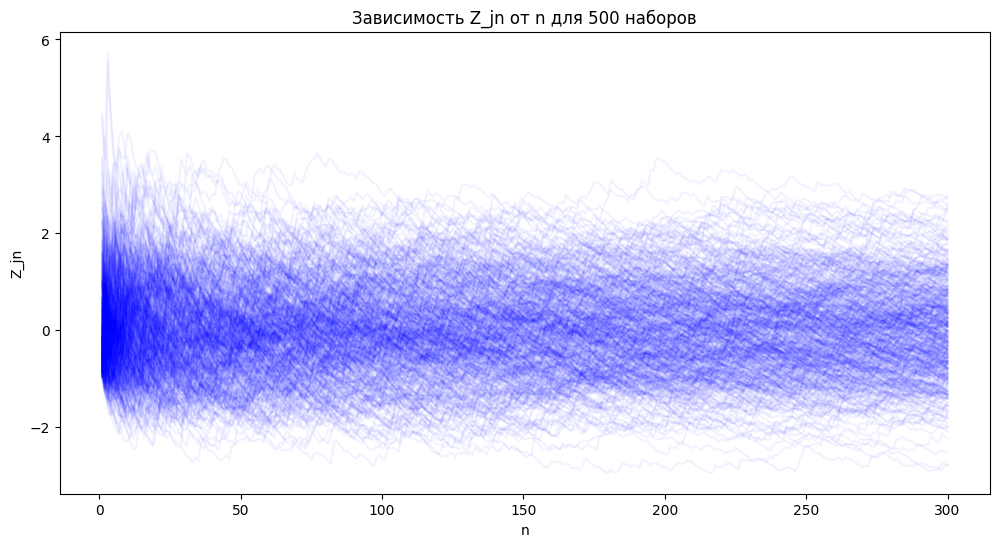

In [95]:
plt.figure(figsize=(12, 6))
for i in range(samples_count):
    plt.plot(range(1, size + 1), Z[i, :], alpha=0.05, color='blue')
plt.xlabel('n')
plt.ylabel('Z_jn')
plt.title('Зависимость Z_jn от n для 500 наборов')
plt.show()

Они колеблются в небольшом отклонении от 0


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

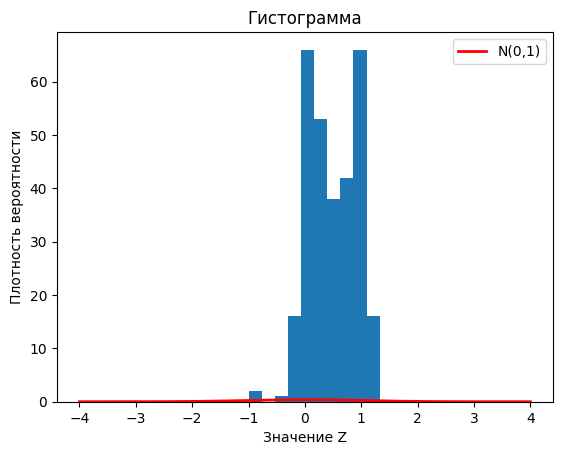

In [96]:
Z_arr = np.array(Z)
plt.hist(Z_arr[299, :])

x = np.linspace(-4, 4, 1000)
plt.plot(x, sps.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
plt.xlabel('Значение Z')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма')
plt.legend()
plt.show()

Сделайте вывод о смысле центральной предельной теоремы.

Как мы видим из полученной нами гистограммы - распределение очень похоже на нормальное. Это означает, что ЦПТ работает!


### Задача 2


Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [97]:
size = 300
samples_count = 500
par_lambda = 1

sample = sps.poisson.rvs(mu = par_lambda, size=(samples_count, size))
print(sample)

[[0 0 0 ... 0 0 0]
 [1 1 2 ... 0 2 0]
 [1 0 0 ... 1 0 0]
 ...
 [2 0 0 ... 1 0 1]
 [2 0 1 ... 0 0 2]
 [0 3 0 ... 1 0 0]]


In [98]:
sums = np.cumsum(sample, axis=1)
print(sums)

[[  0   0   0 ... 302 302 302]
 [  1   2   4 ... 306 308 308]
 [  1   1   1 ... 286 286 286]
 ...
 [  2   2   2 ... 308 308 309]
 [  2   2   3 ... 299 299 301]
 [  0   3   3 ... 295 295 295]]


In [99]:
Z = np.zeros_like(sums)

for j in range(1, size + 1):
    EX_jn = j * par_lambda
    DX_jn = j * par_lambda
    
    Z[:, j-1] = (sums[:, j-1] - EX_jn) / np.sqrt(DX_jn)

Text(0, 0.5, 'Z_jn')

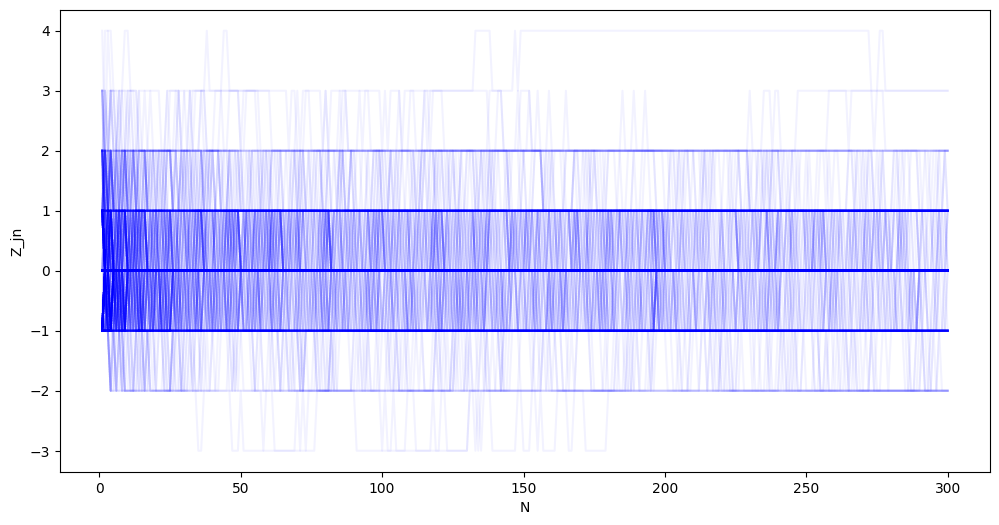

In [100]:
plt.figure(figsize=(12, 6))
for i in range(samples_count):
    plt.plot(range(1, size + 1), Z[i, :], alpha=0.05, color='blue')
plt.xlabel('N')
plt.ylabel('Z_jn')

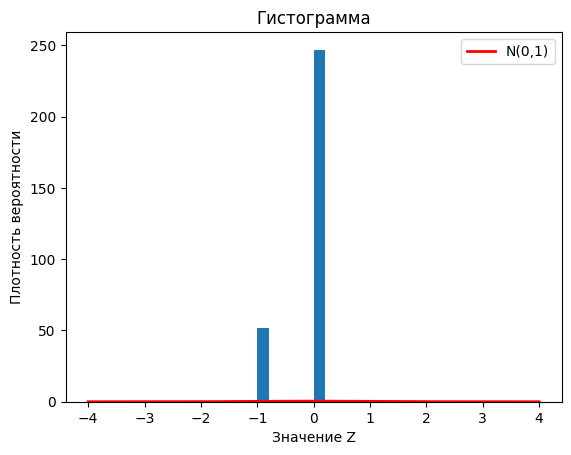

In [101]:
Z_arr = np.array(Z)
plt.hist(Z_arr[299, :])

x = np.linspace(-4, 4, 1000)
plt.plot(x, sps.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
plt.xlabel('Значение Z')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма')
plt.legend()
plt.show()

Центральная предельная теорема утверждает, что сумма достаточно большого числа независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному, независимо от формы исходного распределения. Мы убедились в этом на примере двух разных распределений, поэтому можно сказать, что ЦПТ действительно имеет смысл и работает.